In [25]:
import pandas as pd
import numpy as np
import sqlalchemy
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import missingno as msno
from bs4 import BeautifulSoup
import requests
import psycopg2
import regex
import pandas.io.sql as sqlio
from scipy import stats
import numpy as np
from shapely.geometry import Point

sns.set(style='ticks') 
sns.mpl.rc('figure', figsize=(10,6))

In [65]:
sql1="select * from gtarent_s;"
connection = psycopg2.connect(user='postgres', password='csda1050',
                                  host="127.0.0.1",
                                  port="5432",
                                  database='postgres')
    
df = sqlio.read_sql_query(sql1, connection)
    
print (df.head(3))
    
connection= None
    
    #cursor = connection.cursor()
    # Print PostgreSQL Connection properties
    #print ( connection.get_dsn_parameters(),"\n")
    # Print PostgreSQL version
    #cursor.execute(myQuery)
    #result=cursor.fetchall()
    #for row in result:
       # print ("Rent_Kijiji", result[0])
#except (Exception, psycopg2.Error) as error :
    #print ("Error while connecting to PostgreSQL", error)

        ad_id                                              title    postdate  \
0  1427365611  Furnished room in renovated condo near York U ...  2019-04-14   
1  1427365545    Small room for rent for may 1st only $600/month  2019-04-14   
2  1427365531  Fully Furnished First Floor (Master Bedroom) R...  2019-04-14   

  adbedrooms adbathrooms adsqft adfurnish adpet  \
0                                     Yes    No   
1                                     Yes    No   
2                                     Yes    No   

                                         description province           city  \
0  Bigsizefurnishedmasterbedroomin3bdrmcompletely...  Ontario  Toronto (GTA)   
1  Smallroomforrentinamassive4bedroomapartmentfor...  Ontario  Toronto (GTA)   
2  FullyfurnishedLargeFirstFloor(MasterBedroom)Ro...  Ontario  Toronto (GTA)   

                      region    price  \
0            City of Toronto  $825.00   
1            City of Toronto  $600.00   
2  Mississauga / Peel Region  

In [66]:
print("Data Types:")
print(df.dtypes)
print("\r\n" "Dimensions of data", df.shape)

Data Types:
ad_id           int64
title          object
postdate       object
adbedrooms     object
adbathrooms    object
adsqft         object
adfurnish      object
adpet          object
description    object
province       object
city           object
region         object
price          object
address        object
geolan         object
geolng         object
dtype: object

Dimensions of data (7397, 16)


In [67]:
len(df.ad_id)==len(set(df.ad_id))

True

In [96]:
df2 = df.sort_values('postdate', ascending=True)

In [97]:
#df2['price']=df2['price'].to_string().replace("$","")
df_st1=df2
df_st1.price= [x.replace('$','') for x in df_st1.price]
df_st1.price= [y.replace(',', '') for y in df_st1.price]
print (df_st1.price.head(5))
df_st1.price =df_st1['price'].astype(str).astype(float)


7396    2600.00
7387          0
7388    1100.00
7389    1900.00
7390    2000.00
Name: price, dtype: object


In [98]:
print(df_st1['adbedrooms'].head(30))
df_t=df_st1

#df_t['adbedrooms']=df_t['adbedrooms'].replace('', 0)
df_t['adbedrooms']=[z.replace('+','') for z in df_t['adbedrooms']]
df_t['adbedrooms']=df_t['adbedrooms'].replace('', 0)
df_t['adbedrooms']=df_t['adbedrooms'].replace('Studio', 0)
df_t['adbedrooms']=df_t['adbedrooms'].replace('Bachelor', 0)
#df_st1['adbedrooms']= [z.replace('+','') for z in df_st1['adbedrooms']]
#df_t.adbedrooms=df_t.adbedrooms.replace('+','')
print(df_t['adbedrooms'].head(30))
df_st1['adbedrooms']=df_t['adbedrooms'].astype(float)
print(df_st1.dtypes)


7396     2
7387     1
7388     2
7389     2
7390     2
7299     1
7392     1
7391     2
7364      
7363      
7361      
7360     2
7359     2
7358     1
7357     2
7356     2
7355     2
7354     2
7353      
7352     2
7351      
7350    4+
7349     1
7348     1
7346     2
4592      
7320     2
7365     2
7366     2
7347     2
Name: adbedrooms, dtype: object
7396    2
7387    1
7388    2
7389    2
7390    2
7299    1
7392    1
7391    2
7364    0
7363    0
7361    0
7360    2
7359    2
7358    1
7357    2
7356    2
7355    2
7354    2
7353    0
7352    2
7351    0
7350    4
7349    1
7348    1
7346    2
4592    0
7320    2
7365    2
7366    2
7347    2
Name: adbedrooms, dtype: object
ad_id            int64
title           object
postdate        object
adbedrooms     float64
adbathrooms     object
adsqft          object
adfurnish       object
adpet           object
description     object
province        object
city            object
region          object
price          float64
address

In [99]:
print(df_st1['adbathrooms'].head(30))
df_t1=df2
df_t1['adbathrooms']=df_t1['adbathrooms'].replace('',0)
print(df_t1['adbathrooms'].head(30))
df_st1['adbathrooms']=df_t1['adbathrooms'].astype(float)
print(df_st1.dtypes)

7396    1.5
7387      1
7388      1
7389      1
7390      1
7299      1
7392      1
7391      1
7364       
7363       
7361       
7360      1
7359      1
7358      1
7357      1
7356      1
7355      1
7354      1
7353       
7352      1
7351       
7350      2
7349      1
7348      1
7346      1
4592       
7320      1
7365      1
7366      2
7347      1
Name: adbathrooms, dtype: object
7396    1.5
7387      1
7388      1
7389      1
7390      1
7299      1
7392      1
7391      1
7364      0
7363      0
7361      0
7360      1
7359      1
7358      1
7357      1
7356      1
7355      1
7354      1
7353      0
7352      1
7351      0
7350      2
7349      1
7348      1
7346      1
4592      0
7320      1
7365      1
7366      2
7347      1
Name: adbathrooms, dtype: object
ad_id            int64
title           object
postdate        object
adbedrooms     float64
adbathrooms    float64
adsqft          object
adfurnish       object
adpet           object
description     object
provinc

In [100]:
df_t2=df2
#print(df_t2['adsqft'].head(30))
df_t2['adsqft']=[z1.replace('+','') for z1 in df_t2['adsqft']]
df_t2['adsqft']=[z2.replace(',','') for z2 in df_t2['adsqft']]
df_t2['adsqft']=df_t2['adsqft'].replace('',0)

df_st1['adsqft']=df_t2['adsqft'].astype(float)
print(df_st1.dtypes)

ad_id            int64
title           object
postdate        object
adbedrooms     float64
adbathrooms    float64
adsqft         float64
adfurnish       object
adpet           object
description     object
province        object
city            object
region          object
price          float64
address         object
geolan          object
geolng          object
dtype: object


In [101]:
df_t3=df2
print(df_t3['geolan'].head(30))
df_t3['geolan']=[z1.replace('+','') for z1 in df_t3['geolan']]
df_t3['geolan']=[z2.replace(',','') for z2 in df_t3['geolan']]
df_t3['geolan']=df_t3['geolan'].str.strip().replace('',0)
print(df_t3['geolan'].head(30))
df_st1['geolan']=df_t3['geolan'].astype(float)
print(df_st1.dtypes)

7396            43.664045
7387            43.723033
7388           43.7231621
7389           43.7367948
7390                     
7299           43.7683779
7392            43.467517
7391           43.6794463
7364                     
7363           43.7375604
7361            43.682253
7360           43.6179934
7359                     
7358                     
7357           43.7962073
7356           43.5743239
7355           43.6207315
7354           43.6645808
7353           43.6535884
7352                     
7351           43.7710056
7350                     
7349                     
7348                     
7346            43.660526
4592                     
7320           44.0580234
7365            43.786439
7366    43.67024310000001
7347           43.6850522
Name: geolan, dtype: object
7396            43.664045
7387            43.723033
7388           43.7231621
7389           43.7367948
7390                    0
7299           43.7683779
7392            43.467517
7391      

In [102]:
df_t4=df2
print(df_t4['geolng'].head(30))
df_t4['geolng']=[z1.replace('+','') for z1 in df_t4['geolng']]
df_t4['geolng']=[z2.replace(',','') for z2 in df_t4['geolng']]
df_t4['geolng']=df_t4['geolng'].str.strip().replace('',0)
print(df_t4['geolng'].head(30))
df_st1['geolng']=df_t4['geolng'].astype(float)
print(df_st1.dtypes)

7396            -79.402898
7387    -79.78551499999999
7388           -79.7156522
7389           -79.2285279
7390                      
7299           -79.3480518
7392           -79.6876659
7391           -79.3497167
7364                      
7363           -79.3415563
7361           -79.3287148
7360           -79.4890743
7359                      
7358                      
7357           -79.4253336
7356           -79.7869611
7355           -79.6432368
7354    -79.38229559999999
7353           -79.7256809
7352                      
7351           -79.4524232
7350                      
7349                      
7348                      
7346    -79.44008319999999
4592                      
7320           -79.4347151
7365           -79.4353321
7366    -79.37624269999999
7347           -79.4504742
Name: geolng, dtype: object
7396            -79.402898
7387    -79.78551499999999
7388           -79.7156522
7389           -79.2285279
7390                     0
7299           -79.3480518


In [103]:
df_st1[['region','adbedrooms','price']].describe()

,adbedrooms,price
count,7397.000000,7.397000e+03
mean,1.161958,5.853518e+03
std,1.253550,2.341581e+05
min,0.000000,0.000000e+00
25%,0.000000,5.000000e+02
50%,1.000000,1.050000e+03
75%,2.000000,1.800000e+03
max,6.000000,1.400200e+07


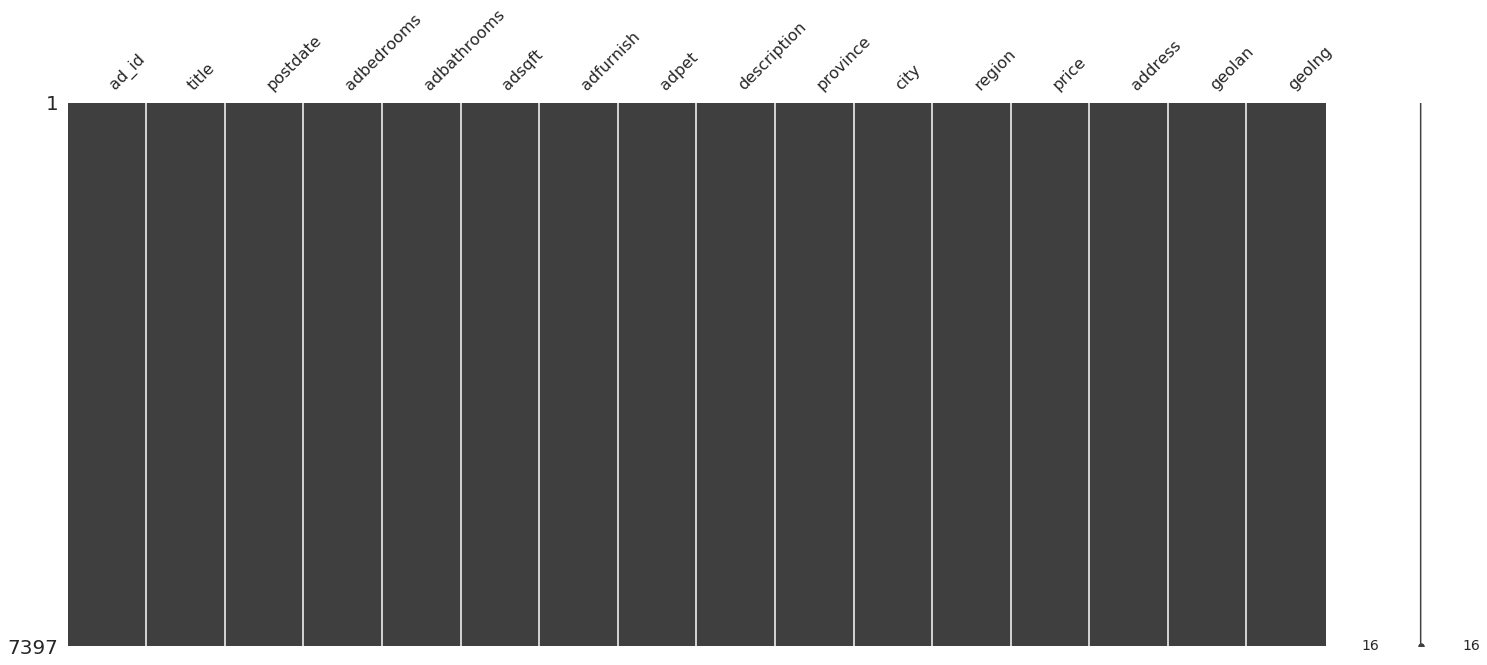

In [37]:
msno.matrix(df_st1)

7396    2.0
7387    1.0
7388    2.0
7389    2.0
7390    2.0
7299    1.0
7392    1.0
7391    2.0
7364    0.0
7363    0.0
Name: adbedrooms, dtype: float64
7396    2600.0
7387       0.0
7388    1100.0
7389    1900.0
7390    2000.0
7299     555.0
7392       0.0
7391    2700.0
7364     750.0
7363       0.0
Name: price, dtype: float64


ValueError: zero-size array to reduction operation minimum which has no identity

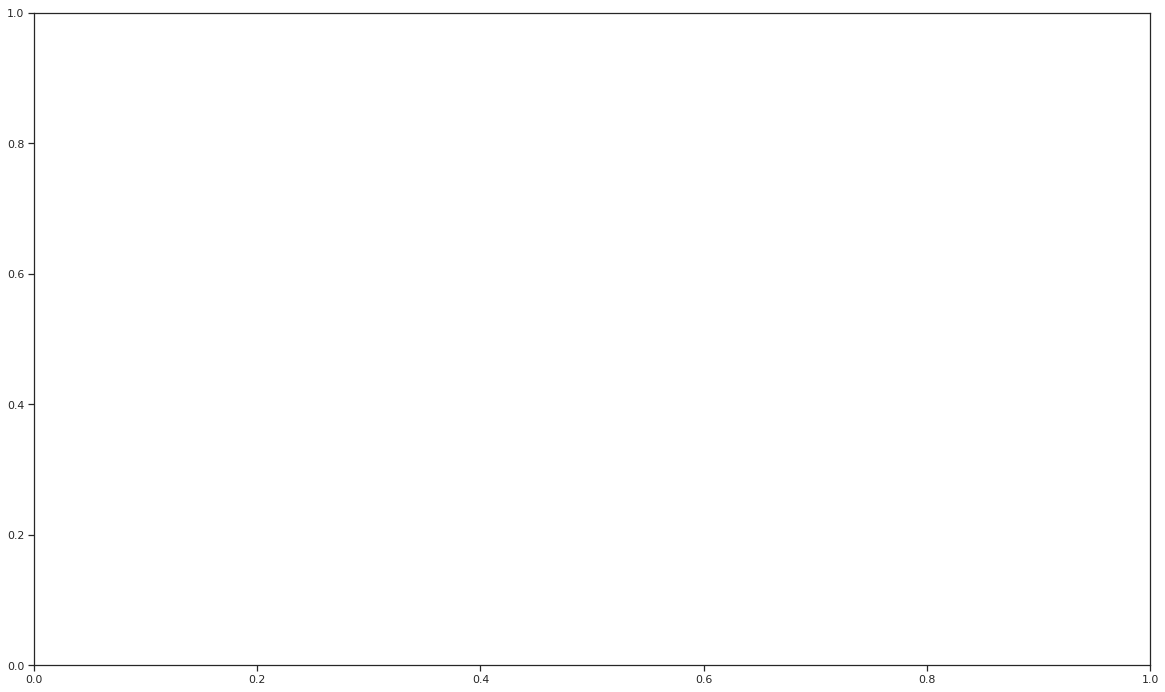

In [38]:
print(df_st1['adbedrooms'].head(10))
print(df_st1['price'].head(10))
msno.heatmap(df_st1[['adbedrooms','postdate','price']])

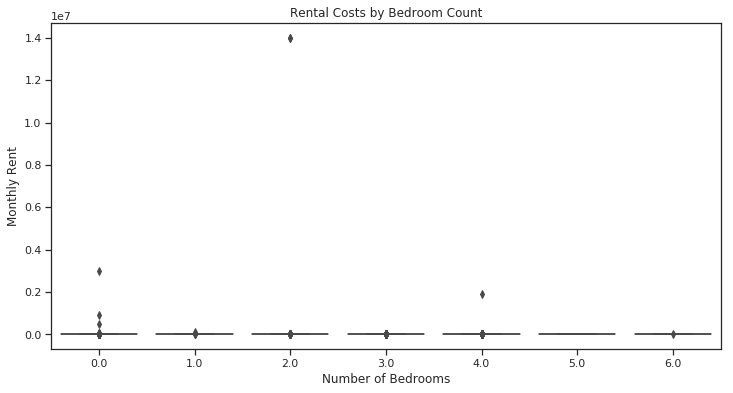

In [39]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(12, 6)
g = sns.boxplot(data = df_st1,x = 'adbedrooms', y = 'price')
g.set(xlabel='Number of Bedrooms', ylabel='Monthly Rent',title='Rental Costs by Bedroom Count')
plt.show()

In [104]:
fp = 'NEIGHBORHOODS_WGS84.shp'

map_df = gpd.read_file(fp)
print(map_df.crs)
# map_df=map_df.to_crs({'init': 'epsg:2019'})

{'init': 'epsg:4326'}


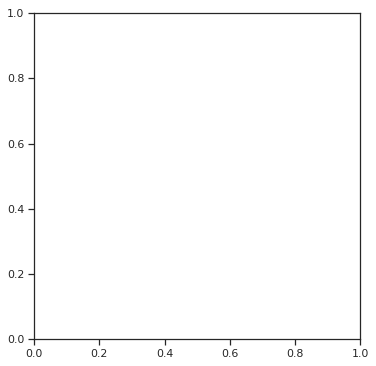

In [105]:
#Preview shapefile
map_df.plot()

In [106]:
df_geo=df_st1
df_geo['coordinates']=list(zip(df_geo.geolng, df_geo.geolan))
print(df_geo['coordinates'].head(10))
df_geo=df_geo[(df_geo['coordinates'])!= (0.0, 0.0)]
print(df_geo['coordinates'].head(10))
df_geo.coordinates = df_geo['coordinates'].apply(Point)
crs = {'init': 'epsg:4326'}
gdf = gpd.GeoDataFrame(df_geo, crs=crs,geometry='coordinates')
gdf.head()

7396            (-79.402898, 43.664045)
7387    (-79.78551499999999, 43.723033)
7388          (-79.7156522, 43.7231621)
7389          (-79.2285279, 43.7367948)
7390                         (0.0, 0.0)
7299          (-79.3480518, 43.7683779)
7392           (-79.6876659, 43.467517)
7391          (-79.3497167, 43.6794463)
7364                         (0.0, 0.0)
7363          (-79.3415563, 43.7375604)
Name: coordinates, dtype: object
7396            (-79.402898, 43.664045)
7387    (-79.78551499999999, 43.723033)
7388          (-79.7156522, 43.7231621)
7389          (-79.2285279, 43.7367948)
7299          (-79.3480518, 43.7683779)
7392           (-79.6876659, 43.467517)
7391          (-79.3497167, 43.6794463)
7363          (-79.3415563, 43.7375604)
7361           (-79.3287148, 43.682253)
7360          (-79.4890743, 43.6179934)
Name: coordinates, dtype: object


/home/forest7/PycharmProjects/untitled/venv/lib/python3.6/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,ad_id,title,postdate,adbedrooms,adbathrooms,adsqft,adfurnish,adpet,description,province,city,region,price,address,geolan,geolng,coordinates
7396,1421849452,TWO BEDROOM APARTMENT FOR RENT DOWNTOWN TORONTO,2019-03-20,2.0,1.5,0.0,Yes,No,TwobedroomapartmentnearSpadinastationandtheUni...,Ontario,Toronto (GTA),City of Toronto,2600.0,"666 Spadina Ave, Toronto, ON M5S 2H8, Canada",43.664045,-79.402898,POINT (-79.40289799999999 43.664045)
7387,1421880653,Wanted: Wanted 1 or 2 bedroom apartment in bra...,2019-03-20,1.0,1.0,0.0,No,No,Wearelookingfora1or2bedroominbramptonplzcall64...,Ontario,Toronto (GTA),Mississauga / Peel Region,0.0,"4 Cochrane Ave, Brampton, ON L6Z 4J4, Canada",43.723033,-79.785515,POINT (-79.78551499999999 43.723033)
7388,1421903645,Wanted: Wantd: 2 bedroom Apartment/Basemnt nea...,2019-03-20,2.0,1.0,0.0,Yes,No,Weare3people(acoupleandagirl)lookingfora2bedro...,Ontario,Toronto (GTA),Mississauga / Peel Region,1100.0,"Bramalea Road, Brampton, L6T2X3",43.723162,-79.715652,POINT (-79.71565219999999 43.7231621)
7389,1421894809,Wanted: Small family of 2 with a toddler looki...,2019-03-20,2.0,1.0,0.0,No,,Smallfamilyof2withatoddlerlookingfora2bedroomh...,Ontario,Toronto (GTA),City of Toronto,1900.0,"30 Glen Muir Dr, Scarborough, ON M1M 2C8, Canada",43.736795,-79.228528,POINT (-79.2285279 43.7367948)
7299,1421836700,space available in 1 bed spacious apt near fai...,2019-03-20,1.0,1.0,0.0,Yes,Yes,Spaceavailableforoneguyinonebedroomspaciousapa...,Ontario,Toronto (GTA),City of Toronto,555.0,"75 Havenbrook Blvd, North York, ON M2J 1A8, Ca...",43.768378,-79.348052,POINT (-79.34805179999999 43.7683779)
